# data collection

               type    locale locale_name                    description  \
date                                                                       
2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

            transferred  
date                     
2012-03-02        False  
2012-04-01        False  
2012-04-12        False  
2012-04-14        False  
2012-04-21        False  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2012-03-02 to 2017-12-26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         350 non-null    object
 1   locale       350 non-null    objec

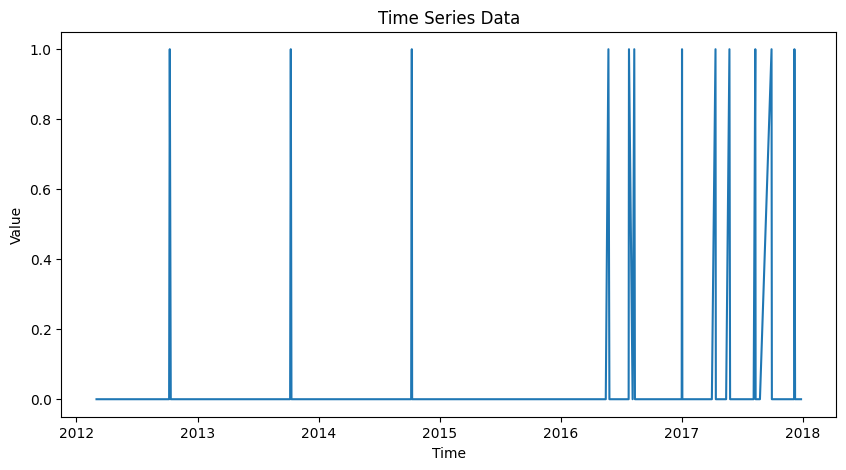

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('holidays_events.csv', parse_dates=['date'], index_col='date')

# Inspect the dataset
print(data.head())
print(data.info())

# Visualize the data
plt.figure(figsize=(10, 5))
plt.plot(data['transferred'])
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
data['transferred'] = scaler.fit_transform(data[['transferred']])

# Create lagged features
data['lag1'] = data['transferred'].shift(1)
data['lag2'] = data['transferred'].shift(2)
data.dropna(inplace=True)

# Split into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Prepare data for RNN
X_train = np.array(train[['lag1', 'lag2']])
y_train = np.array(train['transferred'])
X_test = np.array(test[['lag1', 'lag2']])
y_test = np.array(test['transferred'])

# Reshape for RNN [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0301
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0223  
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0222 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138     
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194     
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0277 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0222 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0255 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072     
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Rescale predictions back to original scale (if scaled earlier)
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
rmse = mean_squared_error(y_test_rescaled, predictions, squared=False)
r2 = r2_score(y_test_rescaled, predictions)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 0.29179052169335984
R² Score: -0.08644367681095688


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
!pip install scikeras
# Import the KerasRegressor from SciKeras instead
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Function to build LSTM model
def build_lstm_model(neurons=50, learning_rate=0.001, optimizer='adam'): # Add optimizer as argument
    model = Sequential()
    model.add(LSTM(neurons, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')  # Use the optimizer argument
    return model

# Wrap the model with KerasRegressor from SciKeras
model = KerasRegressor(build_fn=build_lstm_model, epochs=50, batch_size=32, verbose=0)

# Define hyperparameters to tune
param_dist = {
    'model__neurons': [50, 100, 150], # Prefix with 'model__'
    'model__learning_rate': [0.001, 0.01, 0.1], # Prefix with 'model__'
    "model__optimizer": ["adam"] # Pass optimizer as a model argument, prefixed with 'model__'
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=3)
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model for prediction
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in 

Best Hyperparameters: {'model__optimizer': 'adam', 'model__neurons': 50, 'model__learning_rate': 0.001}


In [ ]:
from sklearn.metrics import accuracy_score

# Threshold for classification (e.g., predicting if the value is above or below a certain level)
threshold = 0.5

# Adjust y_test_binary to match the size of predictions_binary
y_test_binary = (y_test[:len(predictions)] > threshold).astype(int)  # Use only the relevant portion of y_test
predictions_binary = (predictions > threshold).astype(int)

accuracy = accuracy_score(y_test_binary, predictions_binary)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9142857142857143
